# Steam Games Dataset Exploratory Analysis
### Kadin McWilliams and Zoe Mecklenburg

### Downloading the data and checking out the empty spaces

In [112]:
#importing important libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

#turns off warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#uploading the file and making sure it's correct
gm=pd.read_csv("games.csv")
gm.head()

#link to data source: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
#initial check out of the dataset
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

In [4]:
#checking out all the column names
gm.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

## Cleaning up that data for analysis

In [5]:
#looking at how many empty spaces we have
gm.isnull().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3567
Supported languages               0
Full audio languages              0
Reviews                       75360
Header image                      0
Website                       45651
Support url                   43511
Support email                 13593
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                81191
User score                        0
Positive                          0
Negative                          0
Score rank                    85059
Achievements                      0
Recommendations                   0
Notes                       

In [3]:
#filling empty space
gm.fillna('NaN',inplace=True)

In [4]:
#making sure the spaces were filled
gm.isnull().sum()

AppID                         0
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
DLC count                     0
About the game                0
Supported languages           0
Full audio languages          0
Reviews                       0
Header image                  0
Website                       0
Support url                   0
Support email                 0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
Metacritic url                0
User score                    0
Positive                      0
Negative                      0
Score rank                    0
Achievements                  0
Recommendations               0
Notes                         0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median p

In [5]:
#replacing spaces in titles
gm.columns=[column.replace(" ", "_") for column in gm.columns]

## Dropping columns for easier data analysis

In [6]:
gm_new=gm
gm_new.drop(['About_the_game','Median_playtime_two_weeks',
             'Categories','Screenshots','Tags','Average_playtime_two_weeks',
             'Score_rank','AppID','Reviews','Header_image','Movies'],axis=1, inplace=True) 
#The dropped data was either links, redundant data or information that could not be used

In [7]:
gm_new.sample(10)

,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,Supported_languages,Full_audio_languages,Website,...,Positive,Negative,Achievements,Recommendations,Notes,Average_playtime_forever,Median_playtime_forever,Developers,Publishers,Genres
51186,Cubytet,"Feb 21, 2022",0 - 20000,0,0,3.99,0,"['English', 'Russian']",[],NaN,...,0,0,15,0,NaN,0,0,AP2 Games,AP2 Games,"Casual,Indie"
5702,Pets No More,"Jul 25, 2021",0 - 20000,0,0,4.99,0,"['English', 'French', 'Italian', 'Spanish - Sp...",[],NaN,...,11,7,0,0,NaN,0,0,Purple Tree S R L,Purple Tree S R L,Sports
24364,Mad Tracks,"Mar 10, 2020",0 - 20000,1,0,9.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,...,101,10,13,0,NaN,401,401,Loadinc Entertainment,Plug In Digital,Racing
73182,A Hint of Purple Playtest,"May 5, 2023",0 - 0,0,0,0.00,0,[],[],NaN,...,0,0,0,0,NaN,0,0,NaN,NaN,NaN
7315,CATGIRL LOVER 2,"Oct 16, 2019",50000 - 100000,3,0,1.99,1,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Japanese']",NaN,...,266,95,26,310,NaN,303,483,CUTE ANIME GIRLS,Tranquility games,"Adventure,Casual,Indie,RPG"
48495,Crapht Box,"Feb 13, 2020",0 - 20000,0,0,4.99,0,"['English', 'Simplified Chinese']","['English', 'Simplified Chinese']",https://paladin-t.github.io/crft/,...,3,1,0,0,NaN,0,0,Tony Wang,Tony Wang,"Casual,Indie,Simulation"
10776,Park Rangers of The Undead,"Aug 18, 2021",0 - 20000,0,0,12.99,0,['English'],['English'],https://www.nightingale-studios.com/,...,3,1,60,0,NaN,0,0,Nightingale Studios,Nightingale Studios,"Action,Adventure,Casual,Indie,Early Access"
38550,Spyer,"Jun 10, 2022",50000 - 100000,0,0,2.99,0,['English'],['English'],NaN,...,1,2,5,0,Blood and violence.,0,0,GamesBraz,GamesBraz,"Action,Adventure,Casual,Indie,Strategy"
54515,Void & Nothingness,"Dec 3, 2016",0 - 20000,0,0,4.99,1,['English'],[],http://www.vysoko.com/,...,4,4,0,0,NaN,0,0,"Milan Kazarka,Jeroen van Oosten",Vysoko Anime Production,"Sexual Content,Adventure,Indie"
75858,Medved Hellraiser 2,"Jul 14, 2023",0 - 0,0,0,2.79,0,"['English', 'Russian']","['English', 'Russian']",NaN,...,0,0,0,0,"Blood, and head explosions by Headshots",0,0,"Cow Games, Falco Software","Cow Games, Falco Software","Action,Adventure,Indie"


## Converting times to datetime and adding a months and year column

In [8]:
gm_new['Release_date']=pd.to_datetime(gm_new['Release_date'])#converting to datetime 
gm_new['Month']=gm_new['Release_date'].dt.month #converting to months
gm_new['Year']=gm_new['Release_date'].dt.year # converting to years
gm_new.head()

,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,Supported_languages,Full_audio_languages,Website,...,Achievements,Recommendations,Notes,Average_playtime_forever,Median_playtime_forever,Developers,Publishers,Genres,Month,Year
0,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],http://www.galacticbowling.net,...,30,0,NaN,0,0,Perpetual FX Creative,Perpetual FX Creative,"Casual,Indie,Sports",10,2008
1,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],http://trainbandit.com,...,12,0,NaN,0,0,Rusty Moyher,Wild Rooster,"Action,Indie",10,2017
2,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],NaN,...,0,0,NaN,0,0,Campião Games,Campião Games,"Action,Adventure,Indie,Strategy",11,2021
3,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],https://henosisgame.com/,...,0,0,NaN,0,0,Odd Critter Games,Odd Critter Games,"Adventure,Casual,Indie",7,2020
4,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],https://www.unusual-games.com/home/,...,17,0,This Game may contain content not appropriate ...,0,0,Unusual Games,Unusual Games,"Adventure,Indie",2,2020


## Basic data description

In [12]:
gm_new.describe()

,Peak_CCU,Required_age,Price,DLC_count,Metacritic_score,User_score,Positive,Negative,Achievements,Recommendations,Average_playtime_forever,Median_playtime_forever,Month,Year
count,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,19.859394,7.755176e+02,104.729681,93.316029,6.789197,2019.802921
std,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,171.446874,1.789338e+04,1142.447517,1510.732101,3.423632,2.894896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1997.000000
25%,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.000000,2018.000000
50%,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,7.000000,2020.000000
75%,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,18.000000,0.000000e+00,0.000000,0.000000,10.000000,2022.000000
max,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,208473.000000,12.000000,2025.000000


## Pair plot overview

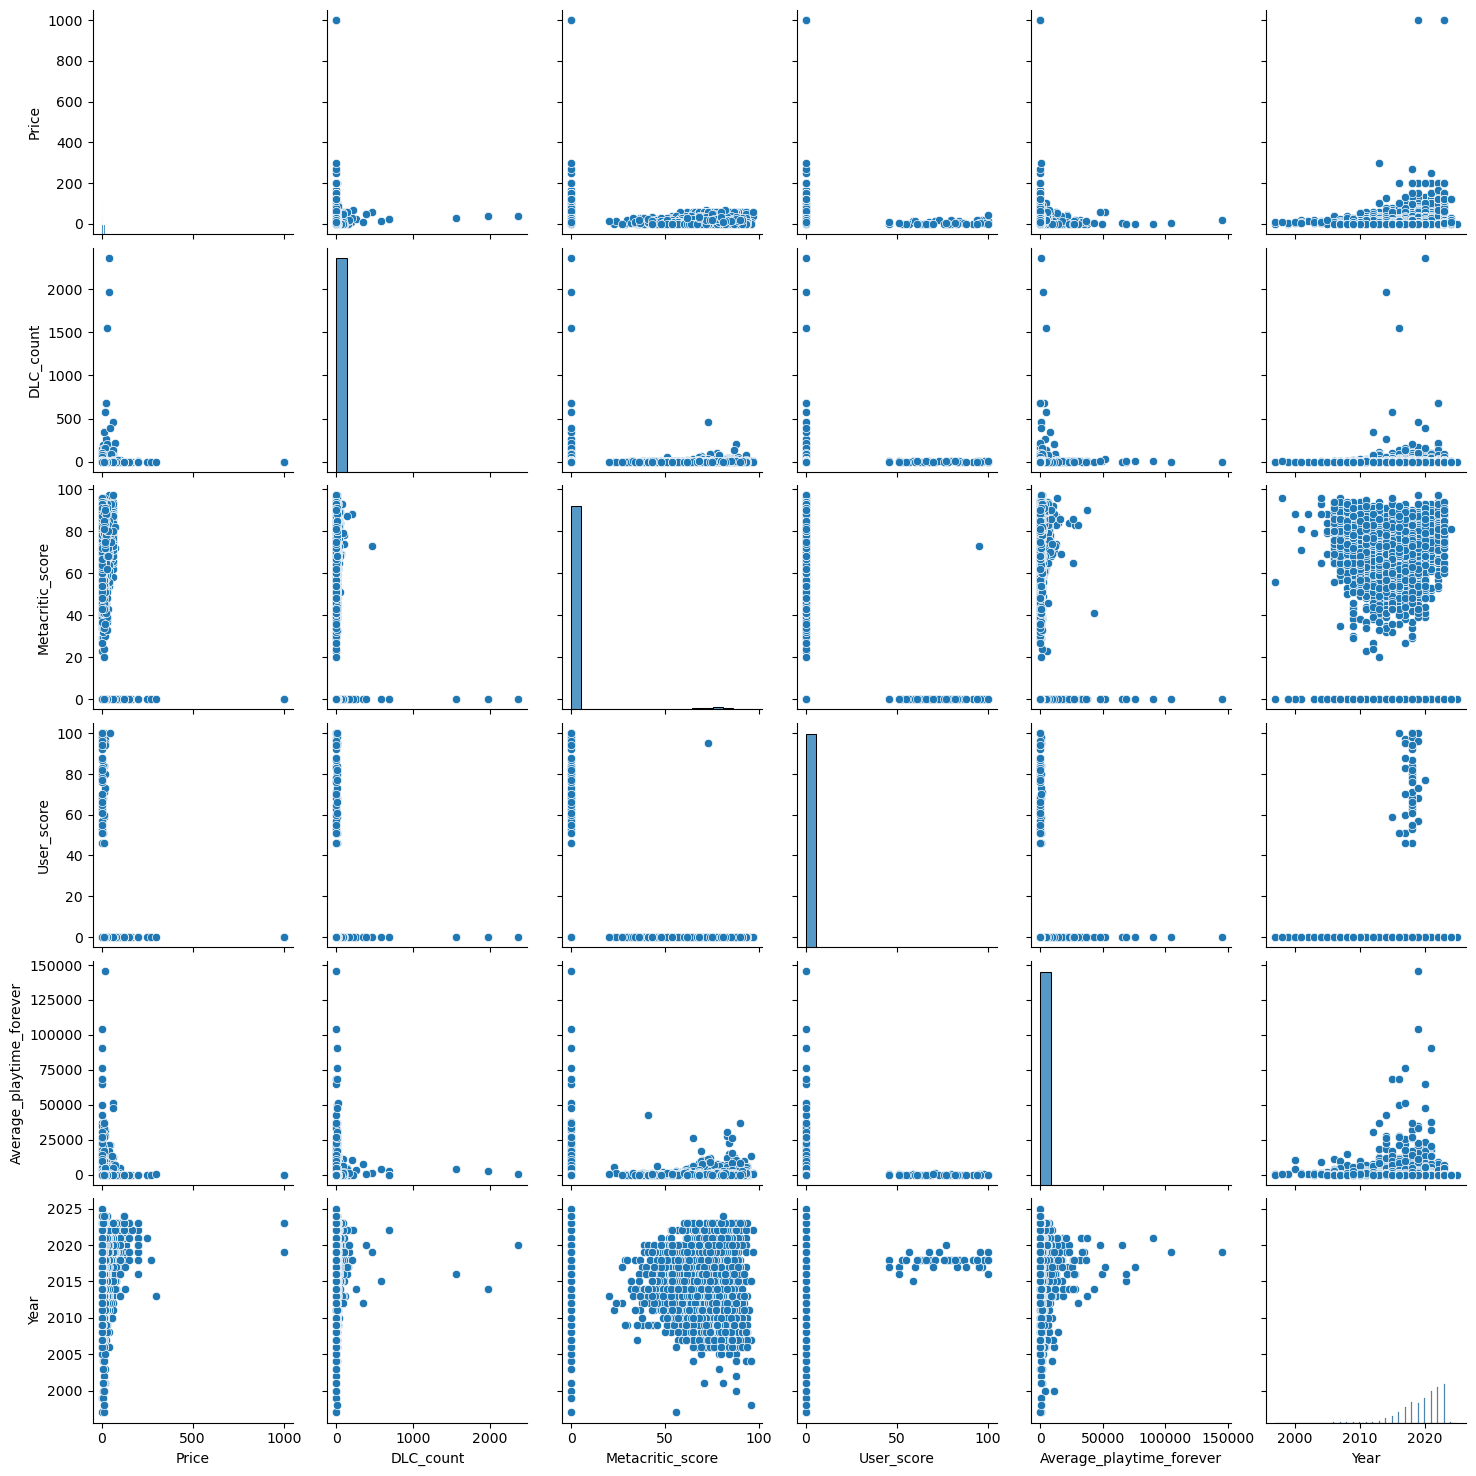

In [13]:
sns.pairplot(gm_new[['Price','DLC_count','Metacritic_score','User_score','Average_playtime_forever',
                    'Year']])
plt.show()

## Heat map 

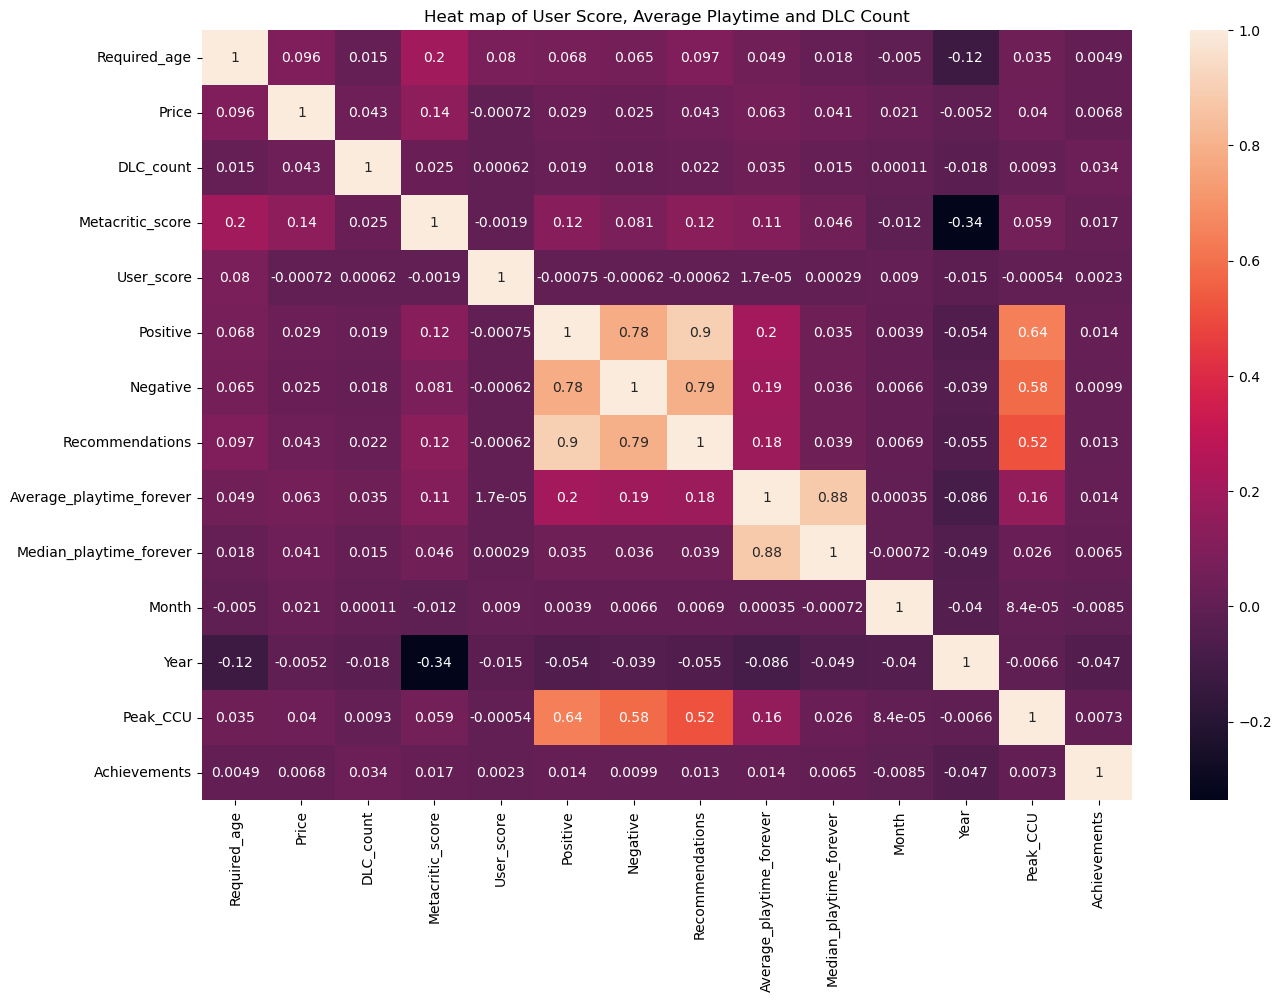

In [14]:
## Visualization of 3 data points
condata=gm_new[['Required_age',
        'Price','DLC_count','Metacritic_score','User_score','Positive','Negative','Recommendations','Average_playtime_forever',
       'Median_playtime_forever','Month','Year','Peak_CCU','Achievements']].corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(condata, annot=True)
plt.title("Heat map of User Score, Average Playtime and DLC Count")
plt.show()


## Findings
- Metacritic score seems to not have a strong correlation to if a game is recieves reccomendations on steam or not 
- Strong correlation between reccomendations and if there are positive or negative 
- Positive reccomendations tend to have a stronge correlation in peak congrent players
- Negative reccomendations and reccomendations tended to have a moderate correlations to peak CCU
- All other factors do not have strong correlations between each other


## Finding out most popular types of games on steam

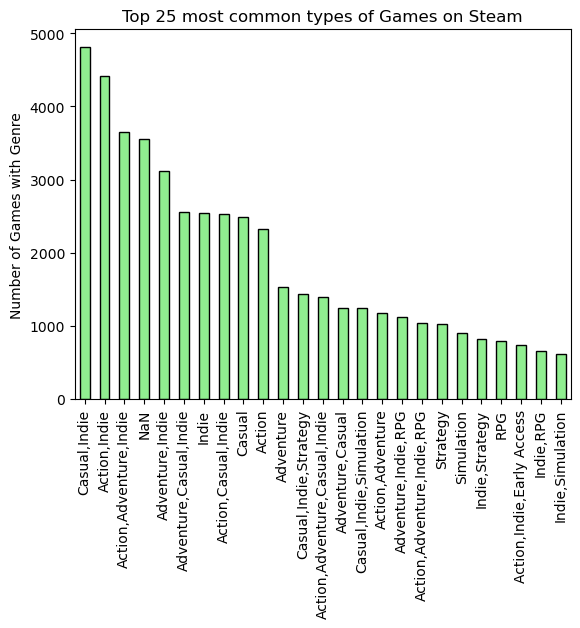

In [15]:
gm_new['Genres'].value_counts().head(25).plot(kind="bar",facecolor="lightgreen",edgecolor="black")
plt.title("Top 25 most common types of Games on Steam")
plt.ylabel("Number of Games with Genre")
plt.show()

## Findings

### Overall top 5 genres
- Casual, Indie
- Action, Indie
- Action, Adventure, Indie
- Adventure, Indie 
- Adventure, Casual, Indie
### Overall top 5 solo categories
- Indie
- Casual 
- Action
- Adventure
- Strategy

### Summary 
Indie is the most popular genre of game created and is included in the overall top 5 genres and in the solo categories. Solo categories tended to be less popular and a combination of genres seems to be the most popular type of game that is developed. The overall genres are a mixture of the top 4 solo categories on the steam games website.

## Finding the most popular games on steam by peak concurrent players

In [ ]:
#gm_new.groupby(by='Name')['Peak_CCU'].nlargest(5)

## Investigating impact of the Peak CCU on Positive and Negative Reviews

In [62]:
print('Maximums of the three columns:')
peak=max(gm_new['Peak_CCU'])
pos=max(gm_new['Positive'])
neg=max(gm_new['Negative'])
print(peak,pos,neg)

Maximums of the three columns:
872138 5764420 895978


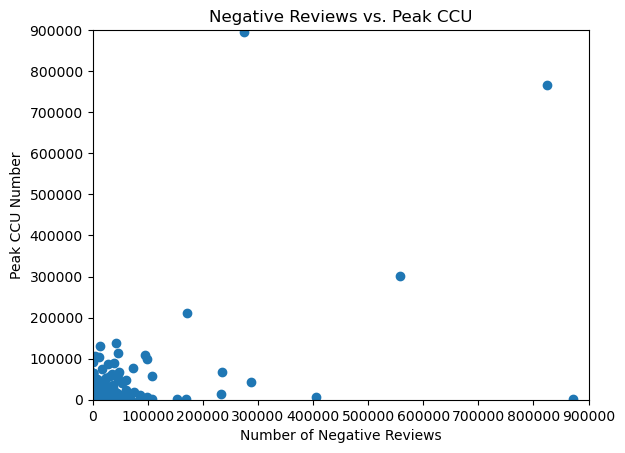

In [51]:
#positive reviews
plt.scatter(gm_new['Peak_CCU'],gm_new['Negative'])
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.xlabel("Number of Negative Reviews")
plt.ylabel("Peak CCU Number")
plt.title("Negative Reviews vs. Peak CCU")
plt.show()

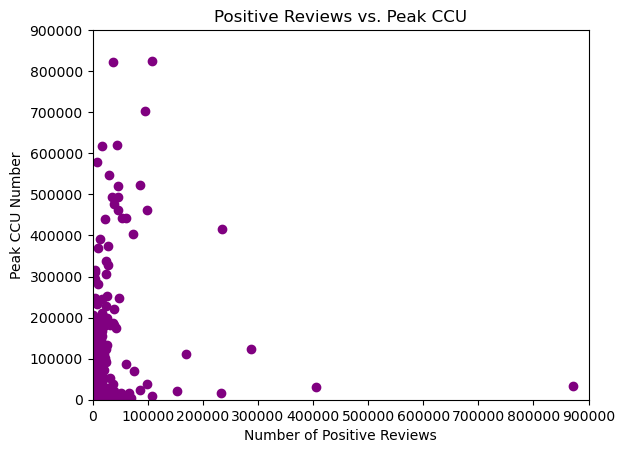

In [52]:
#positive reviews
plt.scatter(gm_new['Peak_CCU'],gm_new['Positive'],color='purple')
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.xlabel("Number of Positive Reviews")
plt.ylabel("Peak CCU Number")
plt.title("Positive Reviews vs. Peak CCU")
plt.show()

### Findings
#### Almost vertical line of best fit in positive reviews and possible rising line of best fit in negative reviews.
#### Negative plot is extremely spread out.

### Summary
#### The possible correlation shown on the heat map appears to be false. We can see on the Positive Review scatterplot that the Peak CCU has almost no affect on the number of positive reviews, like suggested previously. And, on the flip side, we can see on the Negative Review scatterplot that the information is too scattered to show any true correlation.

## How many players are on mac vs windows vs linux?

<Axes: >

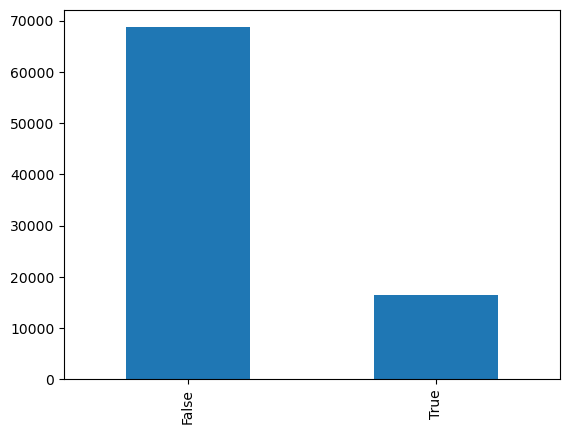

In [141]:
gm_new['Mac'].value_counts().plot(kind='bar')

<Axes: >

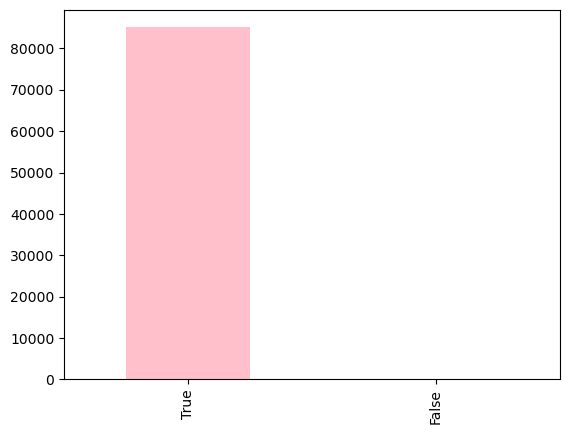

In [142]:
gm_new['Windows'].value_counts().plot(kind='bar',color='pink')

<Axes: >

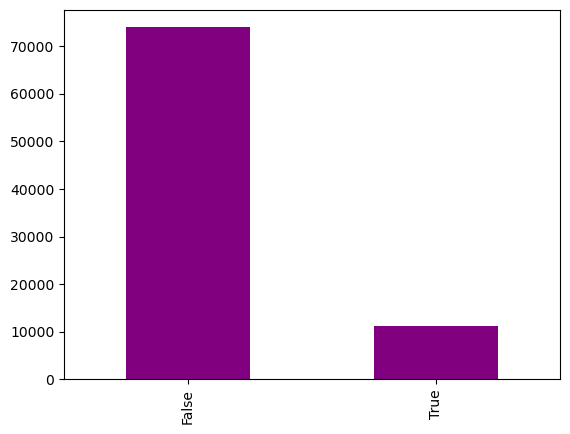

In [144]:
gm_new['Linux'].value_counts().plot(kind='bar',color='purple')

### Findings
#### Very little people use Mac and Linux
#### Lots of people use Windows

### Summary
#### Most people use Windows computers to play video games off of Steam